<a href="https://colab.research.google.com/github/WendyGL96/Machine_Learning_PLN/blob/main/S1TC1_arboles_ensamblajes_Wendy_Galvis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [43]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [ ]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [ ]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [ ]:
## Análisis de máximos y mínimos por horas
total_por_hora = bikes.groupby('hour')['total'].mean()
horas_mas_alquiladas = total_por_hora.sort_values(ascending=False)
top_tres_horas = horas_mas_alquiladas.head(3)
print("Las tres horas en las que más se alquilan bicicletas son:")
print(top_tres_horas)
horas_menores = horas_mas_alquiladas.tail(3)
print("Las tres horas en las que menos se alquilan bicicletas son:")
print(horas_menores)
## Análisis de máximos y mínimos por estación
total_por_estacion = bikes.groupby('season')['total'].mean()
estacion_mas_alquiladas = total_por_estacion.idxmax()
max_alquiladas = total_por_estacion.max()
estacion_menos_alquiladas = total_por_estacion.idxmin()
min_alquiladas = total_por_estacion.min()
print("La estación en la que se alquilan más bicicletas es la número:", estacion_mas_alquiladas)
print("Promedio de alquileres de bicicletas en esta estación:", max_alquiladas)
print("La estación en la que se alquilan menos bicicletas es la número:", estacion_menos_alquiladas)
print("Promedio de alquileres de bicicletas en esta estación:", min_alquiladas)

Las tres horas en las que más se alquilan bicicletas son:
hour
17    468.765351
18    430.859649
8     362.769231
Name: total, dtype: float64
Las tres horas en las que menos se alquilan bicicletas son:
hour
5    19.767699
3    11.757506
4     6.407240
Name: total, dtype: float64
La estación en la que se alquilan más bicicletas es la número: 3
Promedio de alquileres de bicicletas en esta estación: 234.417124039517
La estación en la que se alquilan menos bicicletas es la número: 1
Promedio de alquileres de bicicletas en esta estación: 116.34326135517499


In [ ]:
# Importar pandas
import pandas as pd

# Calcular percentiles para la variable 'total' agrupando por 'hour' y 'season'
percentiles_por_hora = bikes.groupby('hour')['total'].describe(percentiles=[.1, .25, .5, .75, .9])
percentiles_por_estacion = bikes.groupby('season')['total'].describe(percentiles=[.1, .25, .5, .75, .9])
print("Percentiles para la variable 'total' agrupados por hora:")
print(percentiles_por_hora)
print("\n")
print("Percentiles para la variable 'total' agrupados por estación:")
print(percentiles_por_estacion)

Percentiles para la variable 'total' agrupados por hora:
      count        mean         std   min    10%     25%    50%     75%  \
hour                                                                      
0     455.0   55.138462   43.620012   2.0   14.4   24.00   41.0   74.50   
1     454.0   33.859031   34.112105   1.0    5.0   11.00   19.0   46.00   
2     448.0   22.899554   26.110267   1.0    3.0    5.00   11.0   32.00   
3     433.0   11.757506   12.666442   1.0    2.0    3.00    6.0   15.00   
4     442.0    6.407240    4.217633   1.0    1.1    3.00    6.0    9.00   
5     452.0   19.767699   12.784293   1.0    4.0    8.00   19.0   29.00   
6     455.0   76.259341   54.745333   1.0   10.4   24.50   75.0  118.00   
7     455.0  213.116484  159.207044   1.0   27.0   63.00  208.0  334.00   
8     455.0  362.769231  231.723065   8.0   70.0  133.50  392.0  563.50   
9     455.0  221.780220   92.099209  14.0   98.8  161.00  217.0  294.50   
10    455.0  175.092308  101.807629  17.0  

## Resultados del análisis descriptivo
Para analizar el comportamiento de los alquileres de las bicicletas en relación con las variables "Hour" y "Season" se evaluó el promedio por cada categoría y se hizo un análisis de los valores máximos, mínimos y de los percentiles de la variable "Total", la cual representa la cantidad de alquileres de bicicletas. De lo anterior, se puede destacar que:
  * Las horas en las que más se alquilan bicicletas son a las 8 am, a las 5 pm y 6 pm. Mientras que las horas en las que menos alquileres se reportan suelen ser muy temprano, especifícamente a las 3, 4 y 5 am.
  * La estación en la que más se alquilan bicicletas es la 3 (Verano) y en la que menos se alquilan bicletas es en la 1 (Invierno), teniendo una diferencia promedio de más de 118 alquieres entre una estación y otra.
  * En cuanto al análisis de los percentiles podemos concluir:
    - En las primeras horas del día la cantidad de alquileres es muy baja, esto se puede observar al revisar el percentil 90 de estas horas y ver que el 90% de los datos la columna "Total" en esas horas es muy bajo comparado con el resto de horas.
    - Entre las 4 pm y las 7 pm se concentra una gran cantidad de alquileres, incluso encontramos que en esta franja horaria el percentil 10, es decir, el primer 10% de los valores de la columna "Total" supera al percentil 90 de las primeras horas del día (1 a 5 am). Lo anterior nos hace pensar que existe una fuerte relación entre la cantidad de alquileres y la hora del día.
    - Respecto a las estaciones encontramos en Invierno la cantidad de alquileres es mucho más baja que en el resto de estaciones. Se encuentra que en invierno el 90% de los valores de "total" son iguales o menores a 274, mientras que en el resto de estaciones el percentil 90 tiene valores entre 447 y 504, lo cual es mucho mayor.


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

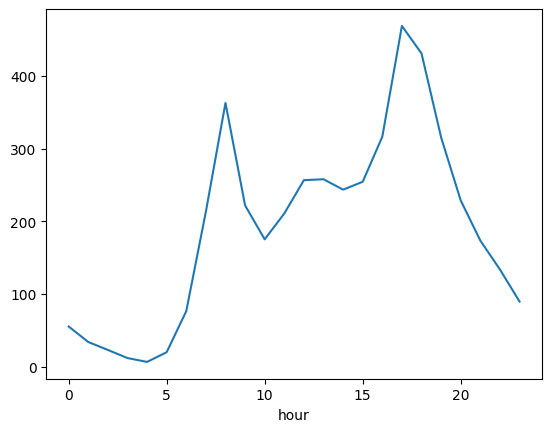

In [ ]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

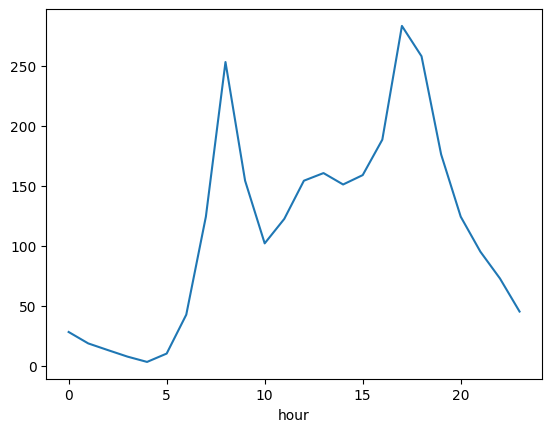

In [ ]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos
bikes_invierno = bikes[bikes['season'] == 1]
bikes_invierno.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

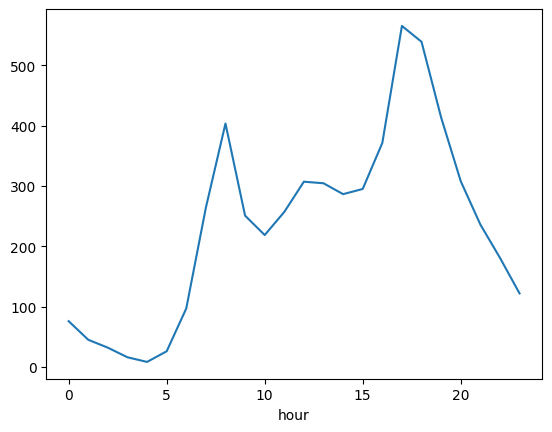

In [ ]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos
bikes_verano = bikes[bikes['season'] == 3]
bikes_verano.groupby('hour').total.mean().plot()

## Conclusiones del análisis gráfico
Los resultados obtenidos en este punto corroboran algunas observaciones previas. Es evidente que existe una marcada disparidad en la cantidad de alquileres entre la temporada de invierno y la de verano. Sin embargo, se puede apreciar un patrón similar en ambas estaciones en lo que respecta a la distribución de alquileres a lo largo del día. En general, las primeras horas del día muestran una menor cantidad de alquileres, mientras que la franja horaria de 4 a 7 pm destaca por tener la mayor cantidad de alquileres. Este comportamiento consistente sugiere una tendencia común en el comportamiento de los usuarios, independientemente de la estación del año.

Pese a lo anterior, tambien se debe destacar que en verano el aumento en la cantidad de alquileres que hay a partir de las 3 pm y hasta las las 7 pm es mucho mayor al aumento observado en invierno, es decir, para esta franja horaria, el aumento parece ser mucho más sútil en invierno.


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [47]:
# Celda 3
bikes['season'] = bikes['season'].astype('category')
X = bikes[['season', 'hour']]
y = bikes['total']
X = pd.get_dummies(X, drop_first=True, dtype=int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Coeficientes:")
print("Intercepto:", modelo.intercept_)
print("Coeficientes para las variables predictoras:")
for i, coeficiente in enumerate(modelo.coef_):
    print(f"{X.columns[i]}: {coeficiente}")
r2 = modelo.score(X_train, y_train)
print("Coeficiente de determinación (R^2):", r2)

Coeficientes:
Intercepto: -7.025709268400163
Coeficientes para las variables predictoras:
hour: 10.644066785094042
season_2: 95.37267992037883
season_3: 118.94705420833598
season_4: 81.80122430354584
Coeficiente de determinación (R^2): 0.22399481988753556


In [49]:
# redicciones del modelo
from sklearn.metrics import mean_squared_error
y_pred = modelo.predict(X_test)
# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 26626.843544254338


## Conclusiones punto 3
A continuación, se interpreta cada uno de los coeficientes:
  * Hora: un aumento en 1 hora aumenta la cantidad de alquileres en 10.6
  * Season_2: que la estación sea primavera aumenta la cantidad de alquileres en 95.3 respecto a que la estación sea invierno.
  * Season_3: que la estación sea verano aumenta la cantidad de alquileres en 118.94 respecto a que la estación sea invierno.
  * Season_4: que la estación sea otoño aumenta la cantidad de alquileres en 81.8 respecto a que la estación sea invierno.

Por otra parte encontramos que el R2 es muy bajo, las variables "Hour" y "Season" solo explican en un 22% la cantidad de alquileres de acuerdo con el modelo de regresión linel.

**Limitaciones de la regresión lineal**: en los puntos anteriores se observó que evidentemente la realción entre la hora y la cantidad de alquileres no es lineal, esto podría causar grandes problemas a la hora de predecir ya que problemente la mayoría de predicciones estarían muy alejadas del valor real. Frente a estos casos en los que se evidencian bastantes fluctuaciones, es mejor implementar un modelo que logre captar mejor las relaciones no lineales. Al observar el coeficiente de la variable "Hours" se hace mucho más evidente este problema, ya que anteriormente vimos que un aumento en las  horas del día no siempre genera un aumento en la cantidad de alquileres, mucho menos se mantiene esta relación a lo largo del día (ni en ninguna de las estaciones), por lo tanto, este modelo no es capaz de captar las relaciones complejas evidenciadas en este caso.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [98]:
# Función para calcular el Error Cuadrático Medio (MSE)
def mse(y):
    return np.mean((y - np.mean(y))**2)

# Función para calcular la ganancia (reducción de MSE)
def mse_reduction(X_col, y, split):
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]

    mse_y = mse(y)
    mse_l = mse(y_l)
    mse_r = mse(y_r)

    mse_reduction_ = mse_y - (y_l.shape[0] / y.shape[0]) * mse_l - (y_r.shape[0] / y.shape[0]) * mse_r

    return mse_reduction_

# Función para encontrar la mejor variable y punto de corte
def find_best_split(X_train, y_train, num_pct=10):
    best_mse_reduction = float('inf')
    best_variable = None
    best_split_point = None

    for col in X_train.columns:
        unique_values = X_train[col].nunique()
        if unique_values <= 2:
            splits = np.percentile(X_train[col], [0, 100])
        else:
            splits = np.percentile(X_train[col], np.arange(0, 100, 100.0 / num_pct).tolist())
            splits = np.unique(splits)

        for split_point in splits:
            mse_reduction_ = mse_reduction(X_train[col], y_train, split_point)

            if mse_reduction_ < best_mse_reduction:
                best_mse_reduction = mse_reduction_
                best_variable = col
                best_split_point = split_point

    return best_variable, best_split_point, best_mse_reduction


In [99]:
best_variable, best_split_point, best_mse = find_best_split(X_train, y_train, num_pct=10)
print("Mejor variable:", best_variable)
print("Mejor punto de corte:", best_split_point)
print("Mejor MSE:", best_mse)

Mejor variable: hour
Mejor punto de corte: 19.0
Mejor MSE: 0.5284326703817896


In [100]:
# Función para construir el árbol de regresión
def tree_grow(X_train, y_train, level=0, min_mse_reduction=0.001, max_depth=None, num_pct=10):
    # Si solo hay una observación, crear un nodo hoja y devolverlo
    if X_train.shape[0] == 1:
        tree = {
            'y_pred': y_train.iloc[0],
            'level': level,
            'split': -1,
            'n_samples': 1,
            'mse_reduction': 0
        }
        return tree

    # Calcular la mejor división
    best_variable, best_split_point, best_mse_reduction = find_best_split(X_train, y_train, num_pct)

    # Guardar el árbol y estimar la predicción
    y_pred = y_train.mean()
    tree = {
        'y_pred': y_pred,
        'level': level,
        'split': -1,
        'n_samples': X_train.shape[0],
        'mse_reduction': best_mse_reduction
    }

    # Revisar el criterio de parada
    if best_mse_reduction < min_mse_reduction:
        return tree
    if max_depth is not None and level >= max_depth:
        return tree

    # Continuar creando la partición
    filter_l = X_train.loc[:, best_variable] < best_split_point
    X_l, y_l = X_train.loc[filter_l], y_train.loc[filter_l]
    X_r, y_r = X_train.loc[~filter_l], y_train.loc[~filter_l]
    tree['split'] = [best_variable, best_split_point]

    # Siguiente iteración para cada partición
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_mse_reduction=min_mse_reduction, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_mse_reduction=min_mse_reduction, max_depth=max_depth, num_pct=num_pct)

    return tree

In [101]:
tree_grow(X_train, y_train, max_depth=3)

{'y_pred': 190.06109324758842,
 'level': 0,
 'split': ['hour', 19.0],
 'n_samples': 8708,
 'mse_reduction': 0.5284326703817896,
 'sl': {'y_pred': 190.43514887436456,
  'level': 1,
  'split': ['season_4', 1.0],
  'n_samples': 6885,
  'mse_reduction': 51.75073007493302,
  'sl': {'y_pred': 186.27577519379844,
   'level': 2,
   'split': ['season_2', 1.0],
   'n_samples': 5160,
   'mse_reduction': 226.04161290894262,
   'sl': {'y_pred': 175.5796847635727,
    'level': 3,
    'split': -1,
    'n_samples': 3426,
    'mse_reduction': 791.057994637129},
   'sr': {'y_pred': 207.40888119953863,
    'level': 3,
    'split': -1,
    'n_samples': 1734,
    'mse_reduction': 1301.741876854394}},
  'sr': {'y_pred': 202.87710144927536,
   'level': 2,
   'split': ['hour', 1.0],
   'n_samples': 1725,
   'mse_reduction': 1230.6062557474506,
   'sl': {'y_pred': 57.56842105263158,
    'level': 3,
    'split': -1,
    'n_samples': 95,
    'mse_reduction': inf},
   'sr': {'y_pred': 211.34601226993865,
    'lev

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [ ]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del MSE para cada valor de máxima profundidad (max_depth)
mse_scores = []

# Importación de modelos de sklearn
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de regresión usando DecisionTreeRegressor de la librería sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    # Calcula el MSE durante la validación cruzada y lo agrega a la lista de puntajes MSE
    mse_scores.append(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean())

Text(0, 0.5, 'MSE')

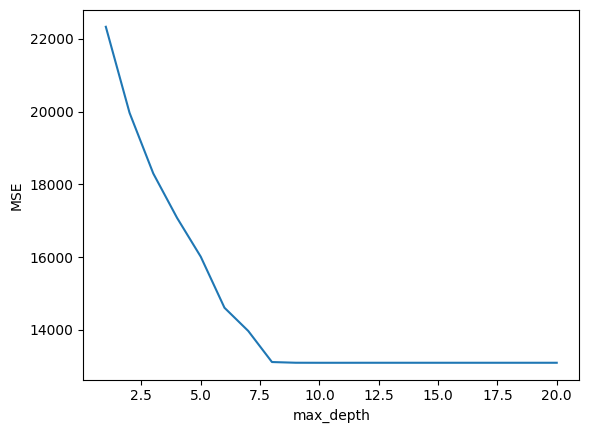

In [ ]:
# Gráfica max_depth versus RMSE (error del modelo)
import matplotlib.pyplot as plt
plt.plot(max_depth_range, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

In [ ]:
# Mejor MSE y su correspondiente max_depth
best_mse, best_max_depth = sorted(zip(mse_scores, max_depth_range))[0]

print("Mejor MSE:", best_mse)
print("Correspondiente max_depth:", best_max_depth)

Mejor MSE: 13090.366390975023
Correspondiente max_depth: 10


In [ ]:
# max_depth=10 fue el mejor, se ajusta un árbol usando este valor
clf = DecisionTreeRegressor(max_depth=10, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=1)

In [ ]:
predicciones = clf.predict(X_test)
mse = mean_squared_error(y_test, predicciones)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 13010.801808605964


Para calibrar el modelo se uso como criterio la profundidad máxima del árbol evaluando para cada profundidad cual sería el MSE, una vez hecho esto se escogió el valor que minimizará el MSE, que en este caso fue 10.

Se procedió a estimar el árbol con un max_depth de 10. Luego, se procedió a realizar las predicciones con el árbol y se evaluó el desempeño. Se encontró que el MSE para este arbol es de 13010.8 lo cual representa una mejora significativa frente al modelo de regresión lineal el cual tuvo un desempeño de 26626.8. Esto confirma lo resaltado anteriormente, pues evidentemente el árbol de regresión logra captar mejor la relación existente entre las variables dependientes y la cantidad de alquileres.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [5]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [6]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [7]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [8]:
# Celda 6
# Calibrar árbol con max depth
max_depth_range = range(1, 21)
accuracy_scores = []
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
for depth in max_depth_range:
    clf_dec = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf_dec, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

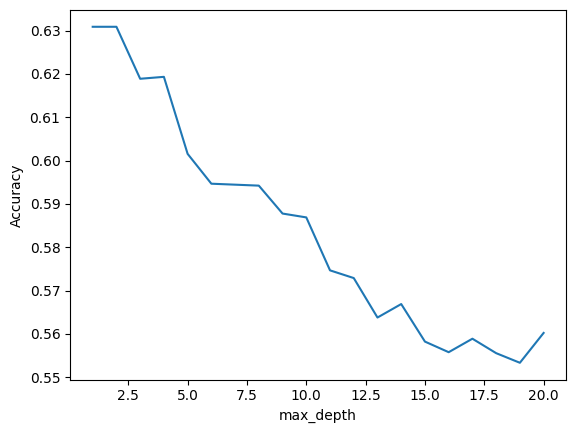

In [ ]:
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [9]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Definición de 2 modelos diferentes: regresión logística y árbol de decisión
models = {'lr': LogisticRegression(),
          'dc': DecisionTreeClassifier(max_depth=2)}

# Entrenamiento de cada modelo
for model in models.keys():
    models[model].fit(X_train, y_train)

In [11]:
# Predicción de las observaciones del set de test para cada modelo
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)
y_pred.head(5)

,lr,dc
1483,1,1
2185,0,1
2520,1,1
3721,1,1
3727,0,0


In [12]:
# Evaluación del desempeño: F1 y Accuracy score
from sklearn import metrics
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = metrics.f1_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"Modelo: {model_name}, F1 Score: {f1}, Accuracy: {accuracy}")

Modelo: lr, F1 Score: 0.6102150537634409, Accuracy: 0.6133333333333333
Modelo: dc, F1 Score: 0.6448598130841121, Accuracy: 0.6453333333333333


Se construyó un arbol de clasificación, el cual se calibró con un profundidad máxima de 2 y un modelo de regresión logística. En ambos casos se evaluó el F1 y el acuraccy score, encontrandose en ambos casos que el desempeño del árbol es mejor.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados.

Nota:

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [13]:
# Celda 7
# Creación de 300 muestras de bootstrap
n_estimators = 300
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

np.random.seed(123)
seeds = np.random.randint(1, 10000, size=n_estimators)

In [14]:
# Entrenamiento de los primeros 100 modelos con max_depth especificado
trees_max_depth = {}
for i in range(100):
    trees_max_depth[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=5, random_state=seeds[i])
    trees_max_depth[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

# Entrenamiento de los siguientes 100 modelos con min_samples_leaf especificado
trees_min_samples_leaf = {}
for i in range(100, 200):
    trees_min_samples_leaf[i] = DecisionTreeClassifier(max_features="sqrt", min_samples_leaf=5, random_state=seeds[i])
    trees_min_samples_leaf[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

# Entrenamiento de los últimos 100 modelos de regresión logística
logistic_models = {}
for i in range(200, 300):
    logistic_models[i] = LogisticRegression(random_state=seeds[i])
    logistic_models[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [16]:
# Desempeño de cada modelo

# Si solo tuvieramos los primeros 100 modelos con max_depth especificado
y_pred_df_trees_max_depth = pd.DataFrame(index=X_test.index, columns=list(range(100)))
for i in range(100):
    y_pred_df_trees_max_depth.iloc[:, i] = trees_max_depth[i].predict(X_test)
y_pred_max_depth = (y_pred_df_trees_max_depth.sum(axis=1) >= (100 / 2)).astype(int)
F1_tree_max_depth = metrics.f1_score(y_pred_max_depth, y_test)
Accuracy_tree_max_depth = metrics.accuracy_score(y_pred_max_depth, y_test)
# Si tuvieramos solo los modelos  con min_samples_leaf especificado
y_pred_df_min_samples_leaf = pd.DataFrame(index=X_test.index, columns=list(range(100)))
for i in range(100, 200):
    y_pred_df_min_samples_leaf.iloc[:, i - 100] = trees_min_samples_leaf[i].predict(X_test)
y_pred_min_samples_leaf = (y_pred_df_min_samples_leaf.sum(axis=1) >= (100 / 2)).astype(int)
F1_tree_min_samples_leaf = metrics.f1_score(y_pred_min_samples_leaf, y_test)
Accuracy_min_samples_leaf = metrics.accuracy_score(y_pred_min_samples_leaf, y_test)
# Si tuvieramos solo los modelos  con regresión logística
y_pred_df_logistic_models = pd.DataFrame(index=X_test.index, columns=list(range(100)))
for i in range(200, 300):
    y_pred_df_logistic_models.iloc[:, i - 200] = logistic_models[i].predict(X_test)
y_pred_logistic_models = (y_pred_df_logistic_models.sum(axis=1) >= (100 / 2)).astype(int)
F1_logistic_models = metrics.f1_score(y_pred_logistic_models, y_test)
Accuracy_logistic_models = metrics.accuracy_score(y_pred_logistic_models, y_test)

In [20]:
print("Los indicadores de desempeño del los árboles con max_depth especificado son: ", F1_tree_max_depth, Accuracy_tree_max_depth)
print("Los indicadores de desempeño del los árboles con min_samples_leaf especificado: ", F1_tree_min_samples_leaf, Accuracy_min_samples_leaf)
print("Los indicadores de desempeño del los modelos con regresión logística: ", F1_logistic_models, Accuracy_logistic_models)

Los indicadores de desempeño del los árboles con max_depth especificado son:  0.6666666666666667 0.6666666666666666
Los indicadores de desempeño del los árboles con min_samples_leaf especificado:  0.651413189771198 0.6546666666666666
Los indicadores de desempeño del los modelos con regresión logística:  0.6139283299526708 0.6193333333333333


In [21]:
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(300)))

# Predicciones para los primeros 100 modelos (árboles con max_depth especificado)
for i in range(100):
    y_pred_df.iloc[:, i] = trees_max_depth[i].predict(X_test)

# Predicciones para los siguientes 100 modelos (árboles con min_samples_leaf especificado)
for i in range(100, 200):
    y_pred_df.iloc[:, i] = trees_min_samples_leaf[i].predict(X_test)

# Predicciones para los últimos 100 modelos de regresión logística
for i in range(200, 300):
    y_pred_df.iloc[:, i] = logistic_models[i].predict(X_test)

y_pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,1,1,0,1,0,0
2520,1,1,1,1,1,0,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Votación mayoritaria
y_pred = (y_pred_df.sum(axis=1) >= (300 / 2)).astype(int)
F1_ensamble = metrics.f1_score(y_pred, y_test)
Accuracy_logistic_models = metrics.accuracy_score(y_pred, y_test)
(F1_ensamble, Accuracy_logistic_models)

(0.6214382632293081, 0.628)


Al comparar los modelos de manera independiente, es decir, evaluando el rendimiento de los 100 modelos con max_depth=5, los 100 modelos con min_samples_leaf=5 y los 100 modelos de regresión logística, con respecto al desempeño del ensamblaje que combina los 300 modelos, observamos que los árboles de decisión tienen un mejor rendimiento cuando se consideran de forma individual, sin la combinación con otros modelos como la regresión logística. El rendimiento del ensamblaje solo superó el desempeño de las regresiones logísticas.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [23]:
# Celda 8
samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [31]:
# Estimación de los errores OOB para cada clasificador
# Errores de los primeros 100 modelos con max_depth especificado
errors_md = np.zeros(100)
for i in range(100):
    y_pred_ = trees_max_depth[i].predict(X_train.iloc[samples_oob[i]])
    errors_md[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
# Errores de los siguientes 100 modelos con min_samples_leaf especificado
errors_ml = np.zeros(100)
for i in range(100, 200):
    y_pred_ = trees_min_samples_leaf[i].predict(X_train.iloc[samples_oob[i]])
    for a in range(100):
      errors_ml[a] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
# Errores de los siguientes 100 modelos con regresion logistica
errors_rl = np.zeros(100)
for i in range(200, 300):
  y_pred_ = logistic_models[i].predict(X_train.iloc[samples_oob[i]])
  for x in range(100):
    errors_rl[x] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

In [36]:
# Combinar los tres arreglos en uno solo
errores = np.concatenate((errors_md, errors_ml, errors_rl))

In [38]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errores) / (1 - errores).sum()

In [40]:
# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)

1483    0.873586
2185    0.688412
2520    0.822446
3721    0.864979
3727    0.147114
4524     0.72858
234     0.059748
4735     0.17441
5839    0.407574
2939    0.739189
3053    0.821468
867     0.826516
276     0.848691
5798    0.088264
3512     0.87298
5789    0.063878
3198    0.774934
5908    0.923749
5718    0.174045
2687    0.098492
dtype: object

In [41]:
# Desempeño al hacer votación ponderada
y_pred = (weighted_sum_1 >= 0.5).astype(int)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6172671651937458, 0.6246666666666667)

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9

Basándonos en los resultados obtenidos, podemos observar que el ensamblaje utilizando votación mayoritaria produjo un F1 score ligeramente superior (0.621) y un accuracy ligeramente más alto (0.628) en comparación con el segundo método, donde el F1 score fue de 0.617 y el accuracy fue de 0.624.

Una ventaja del ensamblaje con votación mayoritaria es su simplicidad y facilidad de implementación. Por otro lado, el segundo método utilizado, aunque produce resultados ligeramente inferiores en este caso, puede tener la ventaja de ser más flexible y adaptable. La votación ponderada permite asignar pesos a las predicciones de acuerdo con la confianza o el rendimiento de los modelos base, lo que puede llevar a una mejora del rendimiento en situaciones donde algunos modelos son más informativos que otros. En nuestro caso, posiblemente no se observó una mejora frente a la votación mayoritaria debido a que los errores en cada modelo eran similares.